<a href="https://colab.research.google.com/github/bluebluegrass/Podcasts-Data/blob/master/%E4%B8%AD%E6%96%87%E6%92%AD%E5%AE%A2%E6%9C%80%E5%8F%97%E6%AC%A2%E8%BF%8E_9_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import codecs
import copy
import csv
import json
import logging
import logging.config
import math
import os
import random
import sys
import warnings
from collections import OrderedDict
from datetime import date, datetime, timedelta
from time import sleep

import requests
from lxml import etree
from requests.adapters import HTTPAdapter
from tqdm import tqdm

import pandas as pd





# Import Data

In [ ]:
#import file from Google Drive

file_path = 'drive/MyDrive/Most Popular Podcasts files/08232021.xlsx'
df = pd.read_excel (file_path)
print (df)


                       Name  ...                                         iTunes URL
0                     老虎工作室  ...  https://podcasts.apple.com/cn/podcast/%E8%80%8...
1                  두시탈출 컬투쇼  ...  https://podcasts.apple.com/cn/podcast/%EB%91%9...
2                      理财投资  ...  https://podcasts.apple.com/cn/podcast/%E7%90%8...
3     Entrepreneurs on Fire  ...  https://podcasts.apple.com/cn/podcast/entrepre...
4             TBS 김어준의 뉴스공장  ...  https://podcasts.apple.com/cn/podcast/tbs-%EA%...
...                     ...  ...                                                ...
5507           鉴谈 | 中西方文化观察  ...  https://podcasts.apple.com/cn/podcast/%E9%89%B...
5508                   限时自躁  ...  https://podcasts.apple.com/cn/podcast/%E9%99%9...
5509                  非主流废物  ...  https://podcasts.apple.com/cn/podcast/%E9%9D%9...
5510                     麻雀  ...  https://podcasts.apple.com/cn/podcast/%E9%BA%B...
5511                   齐天大圣  ...  https://podcasts.apple.com/cn/podcast/%E9%

In [ ]:
#how many podcasts

len(df.index)

5512

# Filter to zh shows only

In [ ]:
df['Language'].notnull()
df_language = df.loc[df['Language'].notnull()]

df_zh = df_language.loc[df_language['Language'].str.contains('^zh')].reset_index()
len(df_zh)

4504

# Basic Stats

In [ ]:
# shows with highest number of episodes
biggest  = df_zh[df_zh['Episode Count'] == max(df_zh['Episode Count'])]
biggest


,index,Name,Artwork,Genre IDs,Episode Count,Feed URL,Language,Explicit,Author,First Episode Date,Last Episode Date,Categories,Key Words,Description,iTunes URL
0,0,老虎工作室,https://is2-ssl.mzstatic.com/image/thumb/Podca...,"['1305', '26']",7387,http://rss.lizhi.fm/rss/231563.xml,zh-CN,0.0,老虎工作室,2014-04-23,2021-03-08,['Kids & Family'],[],人人都是主播,https://podcasts.apple.com/cn/podcast/%E8%80%8...


In [ ]:
# oldest show
oldest  = df_zh[df_zh['First Episode Date'] == min(df_zh['First Episode Date'])]
oldest

,index,Name,Artwork,Genre IDs,Episode Count,Feed URL,Language,Explicit,Author,First Episode Date,Last Episode Date,Categories,Key Words,Description,iTunes URL
151,224,都市车天下,https://is5-ssl.mzstatic.com/image/thumb/Podca...,"['1503', '26', '1502']",695,http://cnrdl.cnr.cn/audio2016/ondemand/podcast...,zh-CN,0.0,NaN,1999-11-29,2017-03-29,['Automotive'],[],《都市车天下》是一档关于汽车的资讯类节目。都市因为汽车变得更美丽，汽车让都市更具魅力，繁华都...,https://podcasts.apple.com/cn/podcast/%E9%83%B...


In [ ]:
# longest running show
date_diff = df_zh['Last Episode Date'] - df_zh['First Episode Date']
# max(df_zh['Last Episode Date'] - df_zh['First Episode Date'])
longest = df_zh[date_diff == max(date_diff)]
longest

,index,Name,Artwork,Genre IDs,Episode Count,Feed URL,Language,Explicit,Author,First Episode Date,Last Episode Date,Categories,Key Words,Description,iTunes URL
277,424,睡前故事-呼呼收音机,https://is4-ssl.mzstatic.com/image/thumb/Podca...,"['1305', '26']",440,http://podcast.vsaker.com/podcast/rss/all.xml,zh-CN,0.0,呼呼,2003-01-12,2020-11-11,['Kids & Family'],['睡前故事\r睡前故事'],专为孩子制作极具想象力的儿童广播剧，亿万次的播放。下载“呼呼收音机APP“ 每天听，宇宙遨游...,https://podcasts.apple.com/cn/podcast/%E7%9D%A...


# Cattegory

In [ ]:
# split category  pick the first one

df_zh['main_category'] = df_zh["Categories"].str.split(",",expand=True)[0]
df_zh['clean_category'] = df_zh_category['main_category'].str.replace("[","").str.replace("]","")

n_by_category = df_zh.groupby(df_zh['clean_category']).size().reset_index(name='counts')
n_by_category

,clean_category,counts
0,,13
1,'',4
2,'Arts',504
3,'Automotive',1
4,'Business',340
5,'Comedy ',1
6,'Comedy',191
7,'Education',476
8,'Fiction',168
9,'Games & Hobbies',81


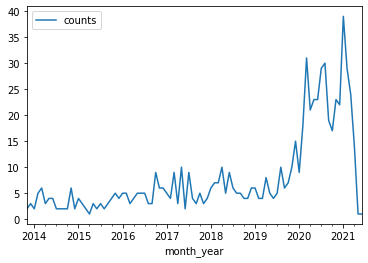

In [ ]:
#Society & Culture
df_society = df_zh.loc[df_zh['clean_category'].str.contains('Society')].reset_index()
len(df_society)

df_society['month_year'] = pd.to_datetime(df_society['First Episode Date']).dt.to_period('M')

df_society_plot = df_society.groupby(df_society['month_year']).size().reset_index(name='counts')
x = 'month_year'
y = 'counts'
df_society_plot.plot(x=x, y=y)


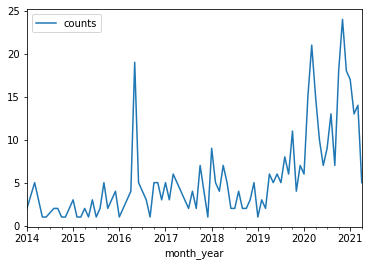

In [ ]:
#Education
df_society = df_zh.loc[df_zh['clean_category'].str.contains('Education')].reset_index()
len(df_society)

df_society['month_year'] = pd.to_datetime(df_society['First Episode Date']).dt.to_period('M')

df_society_plot = df_society.groupby(df_society['month_year']).size().reset_index(name='counts')

x = 'month_year'
y = 'counts'
df_society_plot.plot(x=x, y=y)


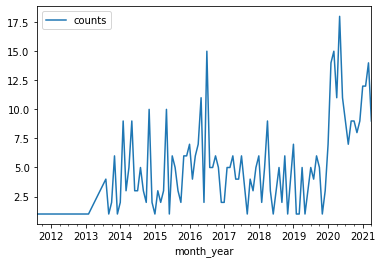

In [ ]:
#Arts
df_society = df_zh.loc[df_zh['clean_category'].str.contains('Arts')].reset_index()
len(df_society)

df_society['month_year'] = pd.to_datetime(df_society['First Episode Date']).dt.to_period('M')

df_society_plot = df_society.groupby(df_society['month_year']).size().reset_index(name='counts')

x = 'month_year'
y = 'counts'
df_society_plot.plot(x=x, y=y)


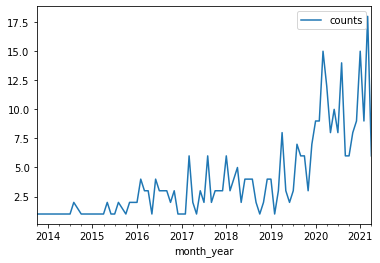

In [ ]:
#Business 
df_society = df_zh.loc[df_zh['clean_category'].str.contains('Business')].reset_index()
len(df_society)

df_society['month_year'] = pd.to_datetime(df_society['First Episode Date']).dt.to_period('M')

df_society_plot = df_society.groupby(df_society['month_year']).size().reset_index(name='counts')

x = 'month_year'
y = 'counts'
df_society_plot.plot(x=x, y=y)